In [134]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)


# __[Распределение Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE)__
<br>
Параметры распределения:<br>
$x_m \geq 0 $ <br>
$k \geq 0 $ <br>
Функция распределения: $1-(\frac{x_m}{x})^k$ <br>
Функция плотности вероятности: $\frac{kx_m^k}{x^k+1}$ <br>
Математическое ожидание: $ \frac{kx_m}{k-1}$ если $k \gt 1 $ <br>
Среднеквадратичное отклонение: $\sqrt {(\frac{x_m^2k}{(k-1)^2(k-2)}}$ если $k \gt 2 $ <br>
Для данной работы выберем значения парамтеров $k=3, x_m=1$

mean =  1.5 standard deviatiion =  0.866025403784


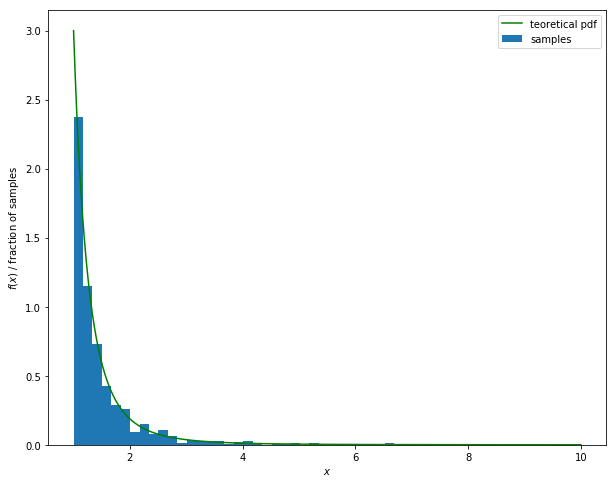

In [135]:
k=3.
xm = 1.
pareto = sts.pareto(k)
xa = np.linspace(xm, 10, 1000)
# Расчитаем мат. ожидание и среднеквадратическое отклонение
mean = k * xm / (k - 1)
sdev = np.sqrt(((xm ** 2) * k)/(((k-1.)** 2) * (k-2.)))
print 'mean = ', mean, 'standard deviatiion = ', sdev
# Создадим выборку на 1000 элементов
sample = pareto.rvs(1000)
plt.plot(xa, pareto.pdf(xa), color = 'green', label = 'teoretical pdf')
plt.hist(sample, bins = 50, normed = True, label = 'samples')
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()
# Выведем графики функции плотности вероятности и  функции вероятности

In [136]:
# Функция генерирования 1000 выборок по n элементов
def gen_matr1000(n):
    return np.array([pareto.rvs(n) for i in xrange(1000)])
# Подсчет среднего в каждой выборке из 1000
def get_med1000(matr, n):
    return np.array([matr[i, :].sum() / n for i in xrange(1000)])

Рассмотрим распределение выборочного среднего случайной величины при $n = 5$

In [137]:
n = 5
sigma5 = sdev / np.sqrt(n)
mean5 = mean
print 'N=', n, ': mean = ', mean5, ' sigma = ', sigma5

N= 5 : mean =  1.5  sigma =  0.387298334621


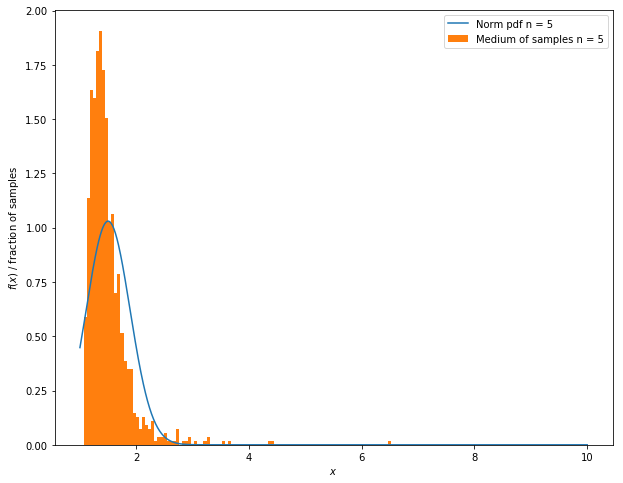

In [138]:

# сгенерируем 1000 выборок по 5. подсчитаем среднее в каждой
matr5 = gen_matr1000(n)
med5 = get_med1000(matr5, n)
norm = sts.norm(mean5, sigma5)
# Построим графики распределения выборочного среднего и нормального распределения
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 5')
plt.hist(med5, bins = 100, normed = True, label = 'Medium of samples n = 5')
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()

Так как распределение Парето сильно скошенное и ограниченно с одной стороны, то выборочное среднее и нормальное распределения существенно отличаются при малых n

Рассмотрим распределение выборочного среднего случайной величины при $n = 50$

In [139]:
n = 50
sigma50 = sdev / np.sqrt(n)
mean50 = mean
print 'N=', n, ': mean = ', mean50, ' sigma = ', sigma50

N= 50 : mean =  1.5  sigma =  0.122474487139


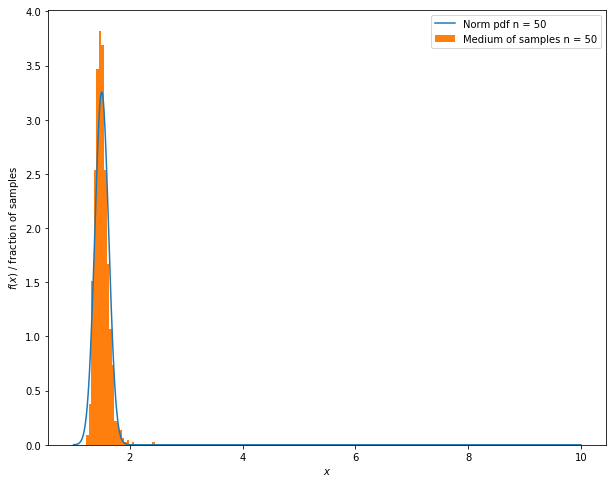

In [140]:
# сгенерируем 1000 выборок по 50. подсчитаем среднее в каждой
matr50 = gen_matr1000(n)
med50 = get_med1000(matr50, n)
norm = sts.norm(mean50, sigma50)
# Построим графики распределения выборочного среднего и нормального распределения
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 50')
plt.hist(med50, bins = 200,  label = 'Medium of samples n = 50', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()

При $n = 50$ аппроксимация улучшается, однако выборочное среднее распределение все еще сильно скошено

Рассмотрим распределение выборочного среднего случайной величины при $n = 100$

In [141]:
n = 100
sigma100 = sdev / np.sqrt(n)
mean100 = mean
print 'N=', n, ': mean = ', mean100, ' sigma = ', sigma100

N= 100 : mean =  1.5  sigma =  0.0866025403784


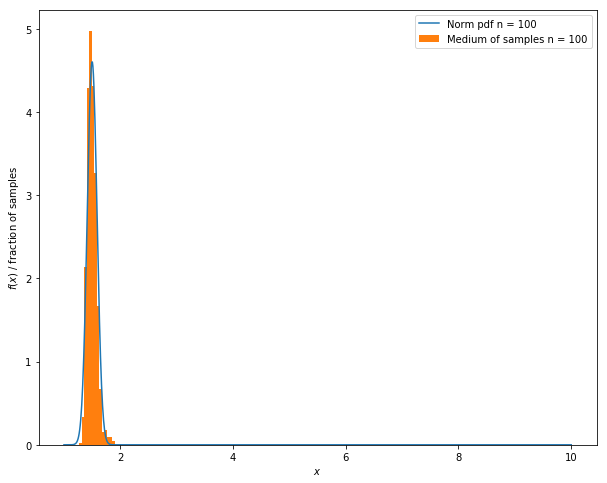

In [142]:
# сгенерируем 1000 выборок по 100. подсчитаем среднее в каждой
matr100 = gen_matr1000(n)
med100 = get_med1000(matr100, n)
norm = sts.norm(mean100, sigma100)
# Построим графики распределения выборочного среднего и нормального распределения
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 100')
plt.hist(med100, bins = 200,  label = 'Medium of samples n = 100', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()

При n = 100 аппрокимация выгёлядит лучше, однако выборочное среднее распределение все еще скошено.

Рассмотрим распределение выборочного среднего случайной величины при $n = 300$

In [143]:
n = 300
sigma300 = sdev / np.sqrt(n)
mean300 = 1.5
print 'N=', n, ' mean = ', mean300, ' sigma = ', sigma300

N= 300  mean =  1.5  sigma =  0.05


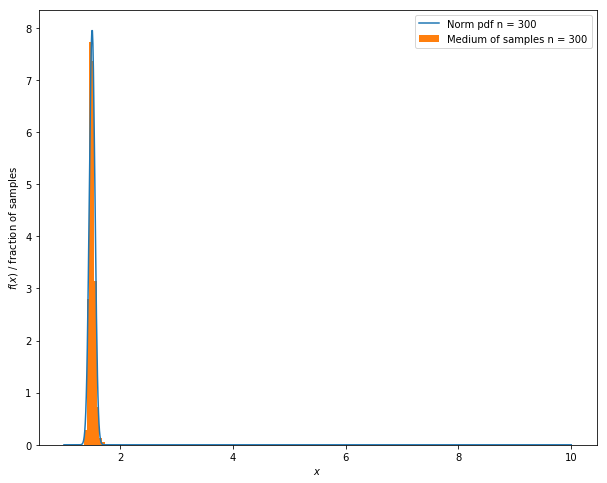

In [144]:
# сгенерируем 1000 выборок по 100. подсчитаем среднее в каждой
matr300 = gen_matr1000(n)
med300 = get_med1000(matr300, n)
norm = sts.norm(mean300, sigma300)
# Построим графики распределения выборочного среднего и нормального распределения
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 300')
plt.hist(med300, bins = 200,  label = 'Medium of samples n = 300', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()

В данном масштабе аппроксимация выглядит намного лучше чем на предыдущих графиках <br>
Рассмотрим участок при x от 1 до 2

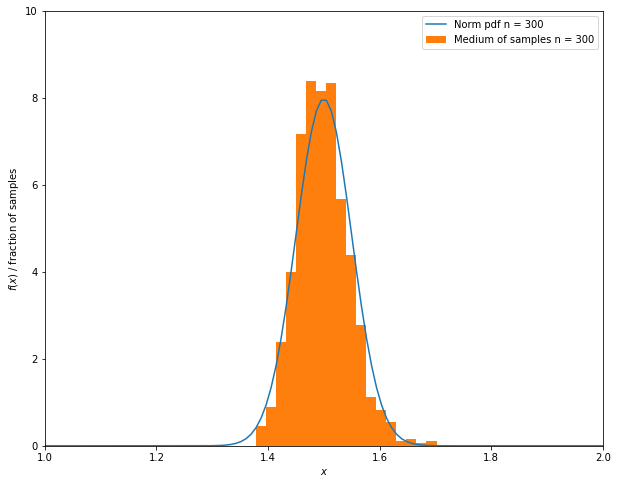

In [145]:
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 300')
plt.hist(med300, bins = 500,  label = 'Medium of samples n = 300', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.axis([1, 2, 0, 10])
plt.show()

Пики графиков распределений все еще смещены относительно друг друга

Рассмотрим распределение выборочного среднего случайной величины при $n = 1000$

In [146]:
n = 1000
sigma1000 = sdev / np.sqrt(n)
mean1000 = 1.5
print 'N=', n, ' mean = ', mean1000, ' sigma = ', sigma1000

N= 1000  mean =  1.5  sigma =  0.0273861278753


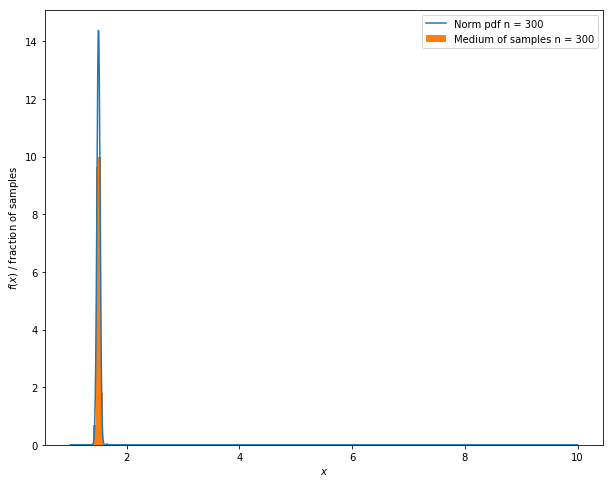

In [160]:
# сгенерируем 1000 выборок по 100. подсчитаем среднее в каждой
matr1000 = gen_matr1000(n)
med1000 = get_med1000(matr1000, n)
norm = sts.norm(mean1000, sigma1000)
# Построим графики распределения выборочного среднего и нормального распределения
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 300')
plt.hist(med1000, bins = 200,  label = 'Medium of samples n = 300', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.show()

В данном масштабе аппроксимация выглядит хорошо.<br>
Рассмотрим подробнее участок при x от 1.3 до 1.7

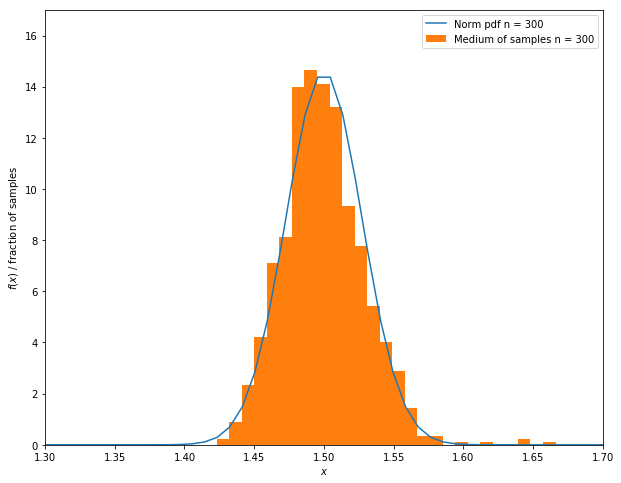

In [161]:
plt.plot(xa, norm.pdf(xa), label = 'Norm pdf n = 300')
plt.hist(med1000, bins = 1000,  label = 'Medium of samples n = 300', range = (1,10), normed = True)
plt.ylabel('$f(x)$ / fraction of samples')
plt.xlabel('$x$')
plt.legend(loc = 'best')
plt.axis([1.3, 1.7, 0, 17])
plt.show()

График стал более симетричным.<br>Максимумы графиков лежат ближе друг к другу по оси x.<br>

Для выполнения задания было выбрано распределение Парето
В данной работе были выбранны значения $$k = 3$$ $$x_m = 1$$
Распределение Парето сильно скошеннное и ограниченно с одной стороны, потому хорошая аппроскимация графиков среднего выборочного и номрального распределения по ЦПТ была достигнута только при большом значении $n = 1000$